In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing data


In [10]:
data_path = r"sample_1.pkl"
data = pd.read_pickle(data_path)

In [11]:
data.head()

,sensor_1,sensor_2,sensor_3,t,x,y
0,0.017775,0.002868,-0.026428,44623.177334,22.813638,56.822044
1,0.013377,0.004557,-0.029993,44623.177339,22.813669,56.822045
2,0.006206,0.005279,-0.030699,44623.177344,22.813700,56.822045
3,-0.007208,0.001699,-0.026993,44623.177349,22.813731,56.822045
4,-0.012578,-0.002372,-0.012529,44623.177354,22.813762,56.822045


#### Plotting statistics

In [12]:
data["dx"] = data["x"].diff()
data["dy"] = data["y"].diff()

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data["ddx"] = data["dx"].diff()
data["ddy"] = data["dy"].diff()

data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


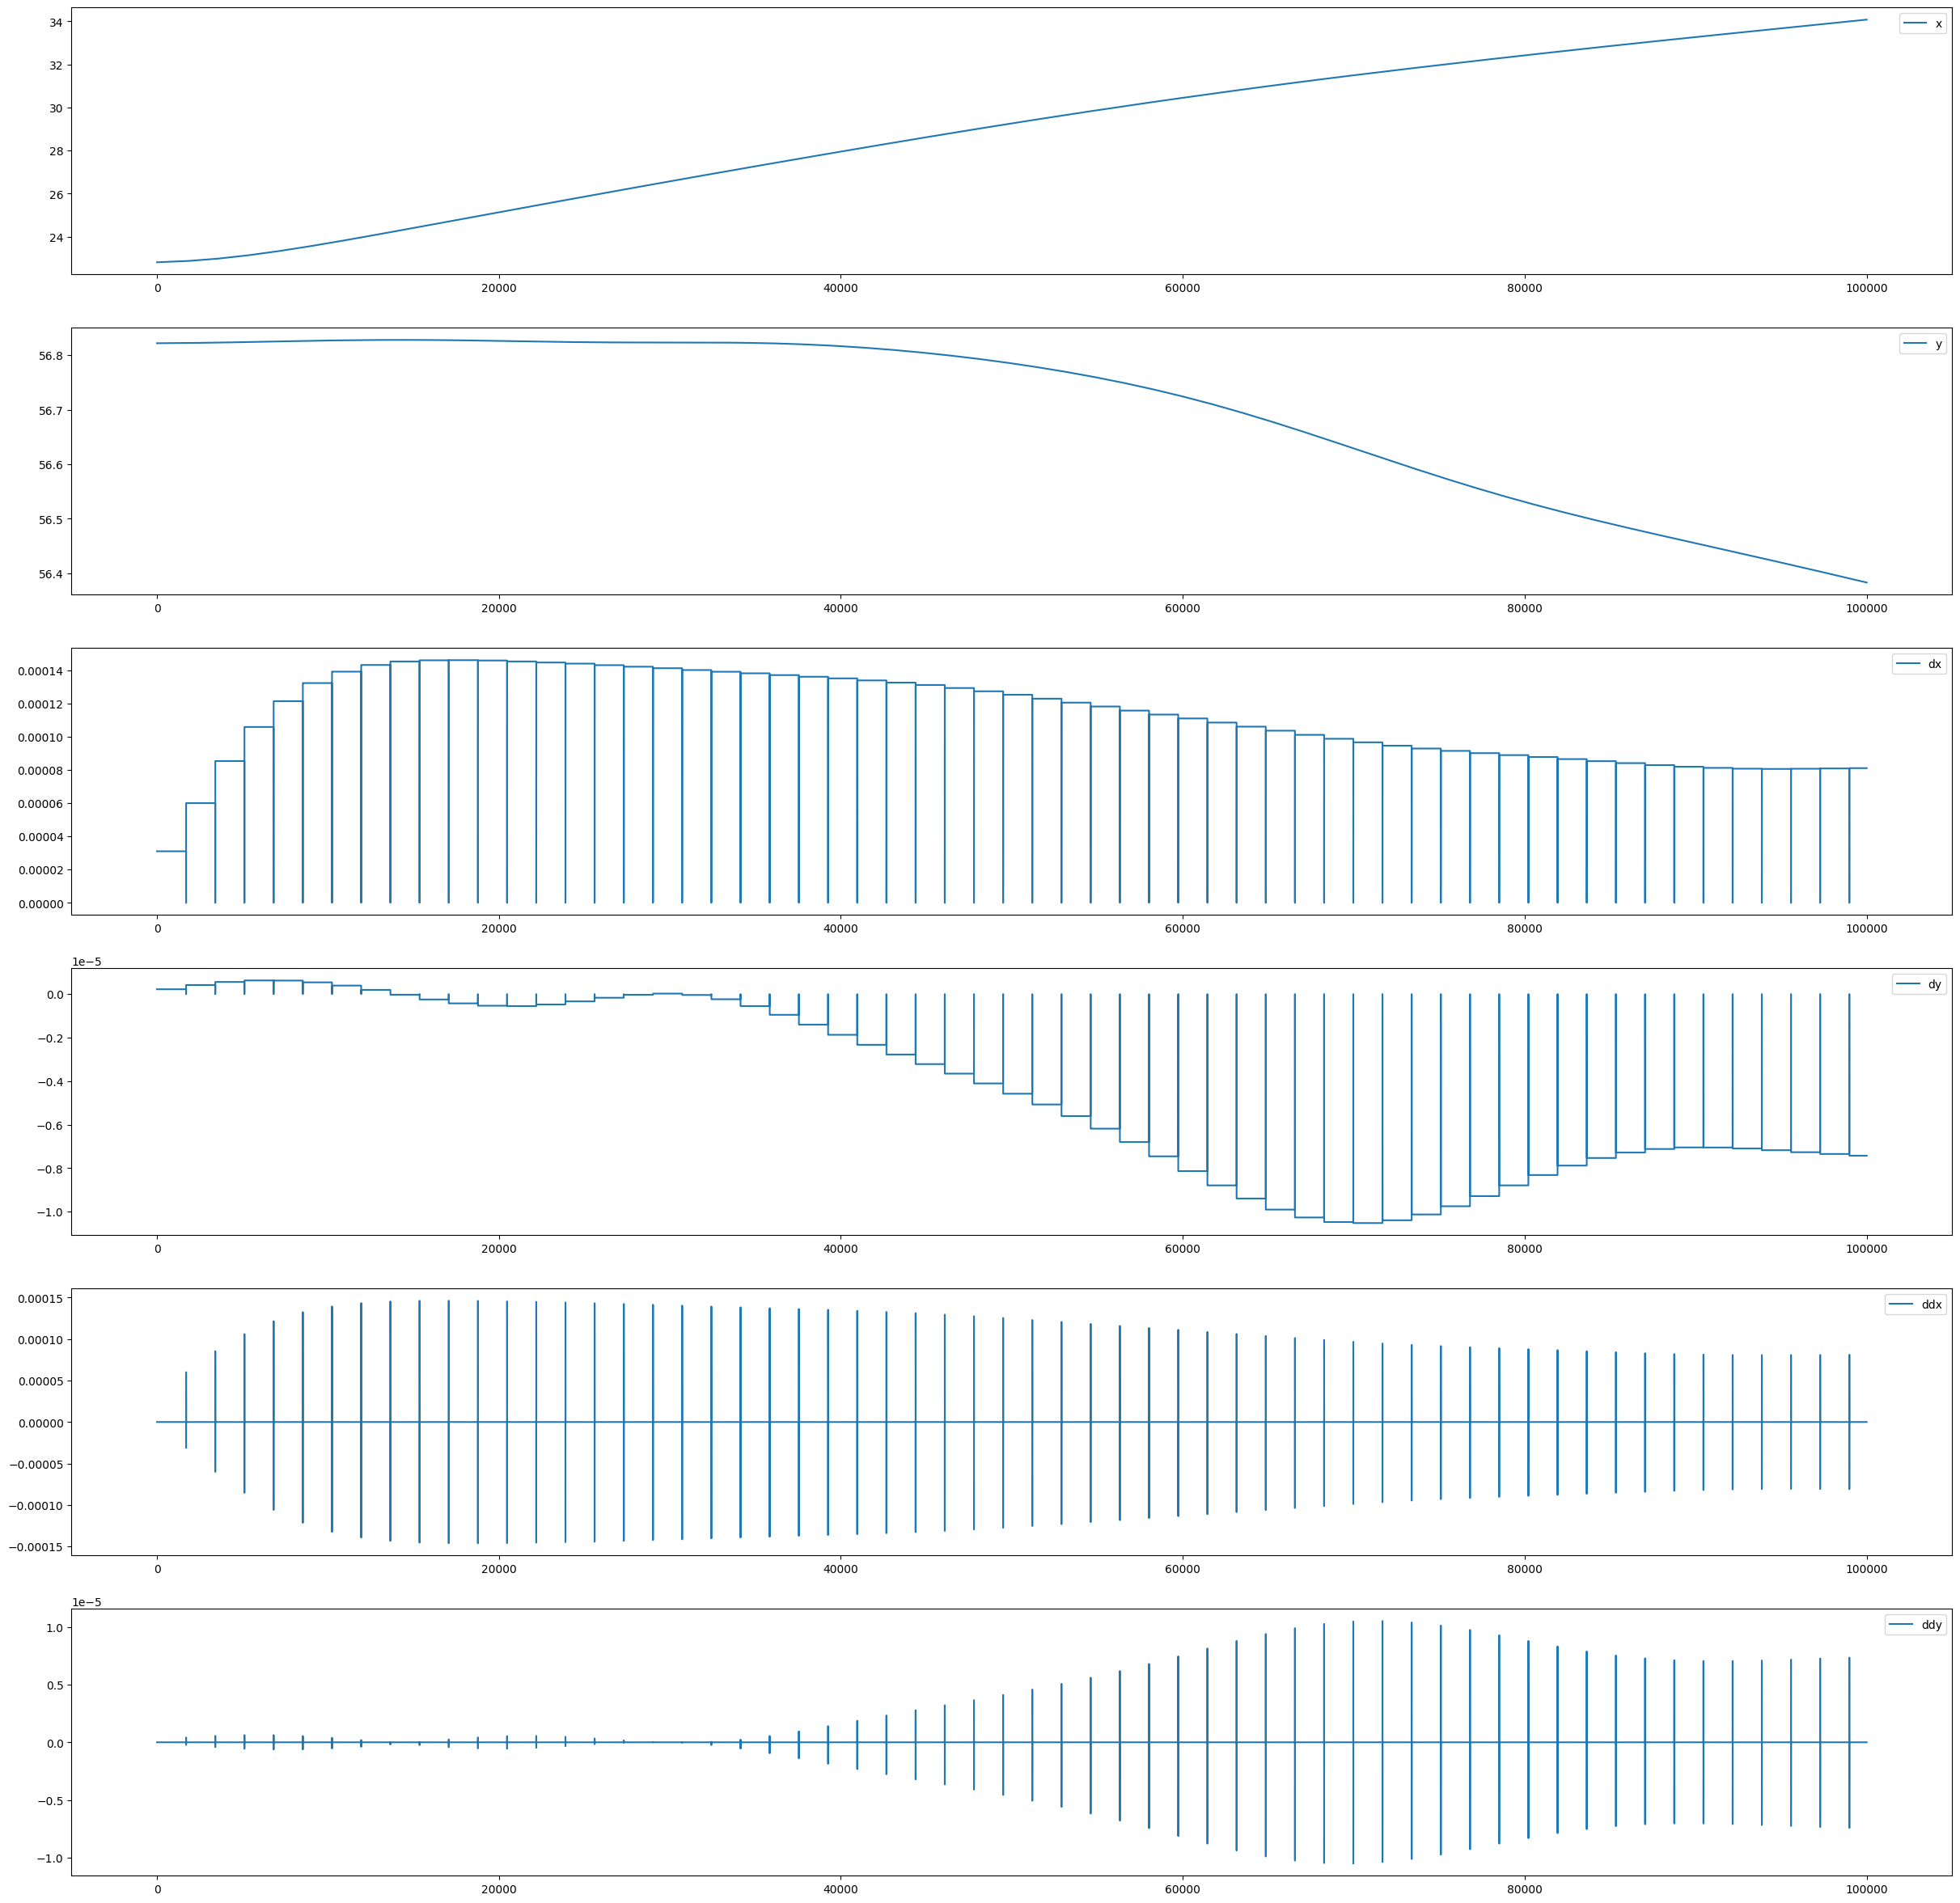

In [13]:
fig, ax = plt.subplots(6, 1, figsize=(30, 30))

k = 100000


ax[0].plot(data["x"][:k], label="x")
ax[1].plot(data["y"][:k], label="y")
ax[2].plot(data["dx"][:k], label="dx")
ax[3].plot(data["dy"][:k], label="dy")
ax[4].plot(data["ddx"][:k], label="ddx")
ax[5].plot(data["ddy"][:k], label="ddy")

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()

plt.show()
